<a href="https://colab.research.google.com/github/priyatharshan1908/Machine-Learning-Capstone-Project--Credit-Card-Fraud-Detection/blob/main/ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# dataset load
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
df

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,Yes
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,No
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,No
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,No


In [ ]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
# check for missing values
df.isnull().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
# Display first few rows
df.head()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,No
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,No
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,No
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,Yes
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,No


In [ ]:
# Summary statistics for numerical features
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000


#  Exploratory Data Analysis (EDA):

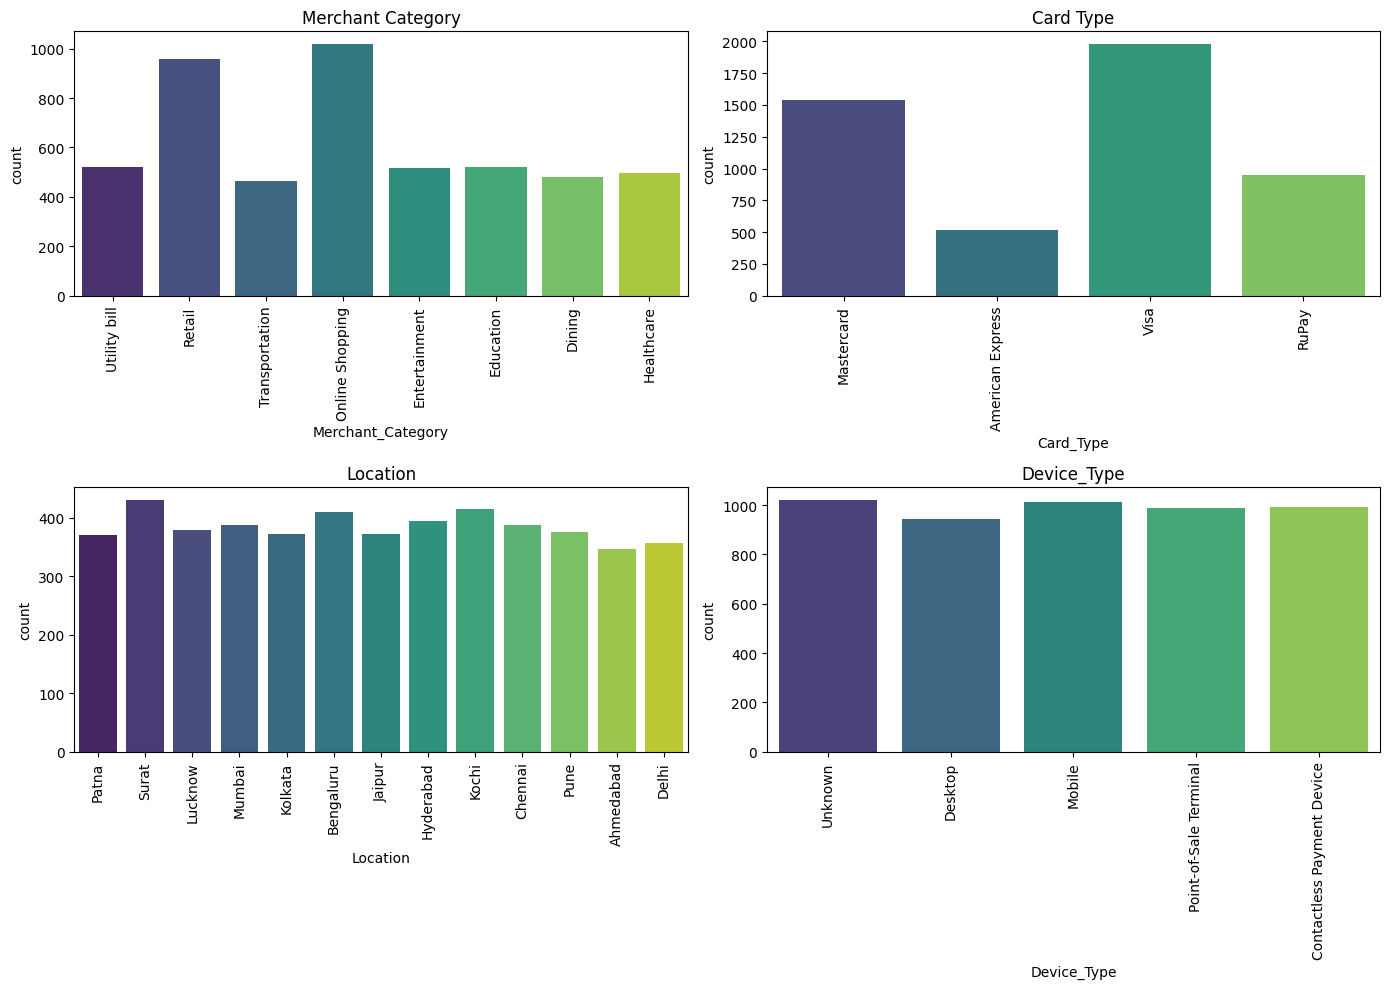

In [ ]:
plt.figure(figsize=(14,10))
#plot of Merchant Category
plt.subplot(2,2,1)
sns.countplot(data=df,x='Merchant_Category',palette="viridis")
plt.xticks(rotation=90)
plt.title('Merchant Category')

#plot of Card Type
plt.subplot(2,2,2)
sns.countplot(data=df,x ='Card_Type',palette="viridis")
plt.xticks(rotation=90)
plt.title('Card Type')

#plot of Location
plt.subplot(2,2,3)
sns.countplot(data=df,x='Location',palette="viridis")
plt.xticks(rotation=90)
plt.title('Location')

#plot of Device Type
plt.subplot(2,2,4)
sns.countplot(data=df,x='Device_Type',palette="viridis")
plt.xticks(rotation=90)
plt.title('Device_Type')

plt.tight_layout()
plt.show()

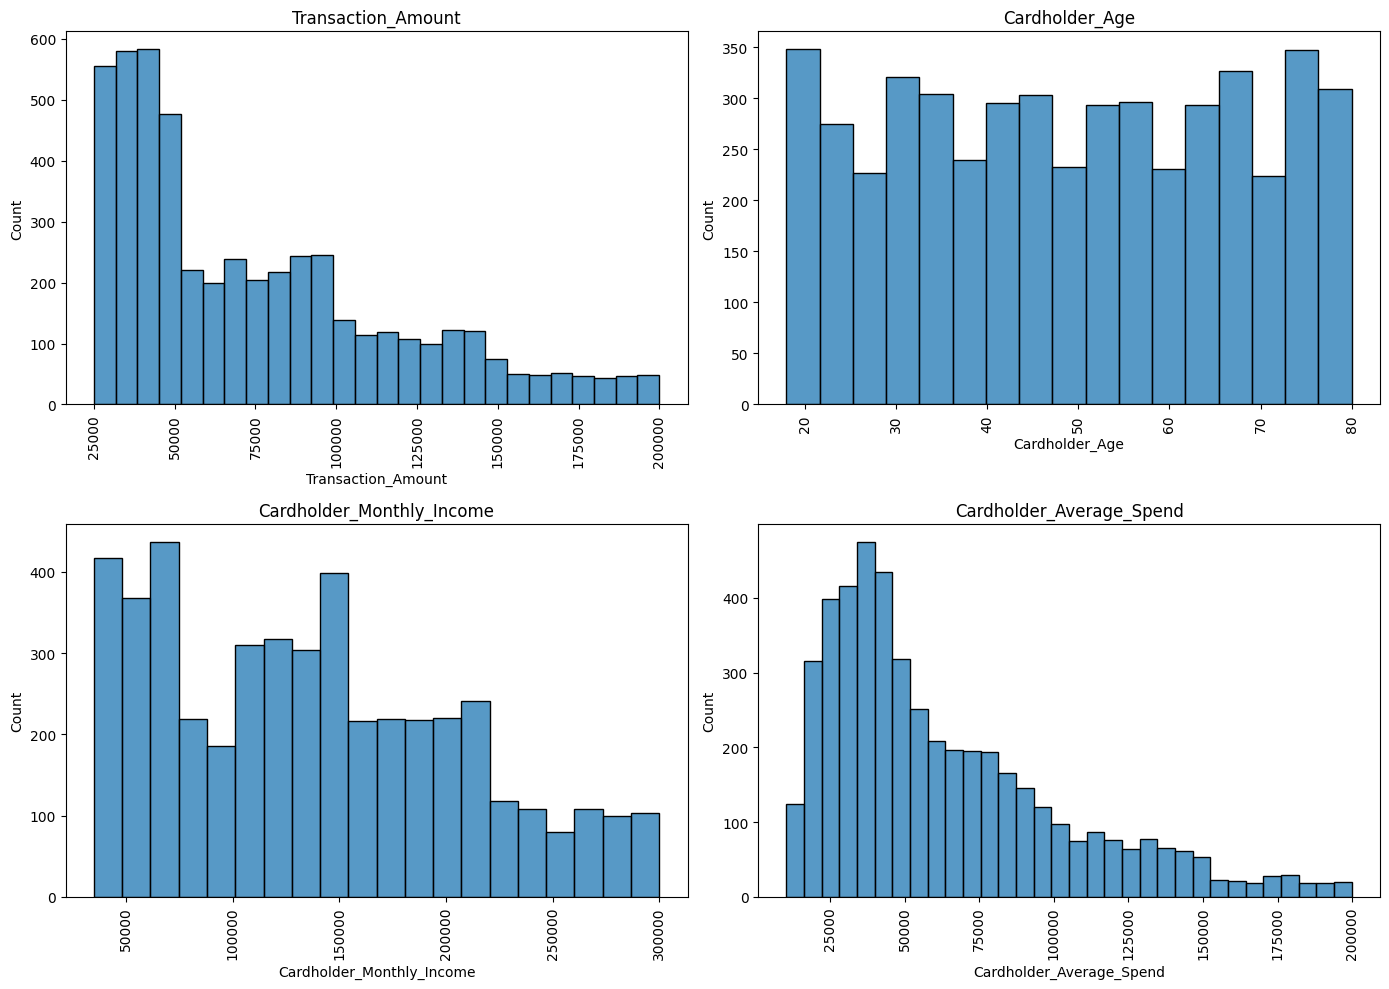

In [ ]:
plt.figure(figsize=(14,10))
#Histplot of Transaction_Amount
plt.subplot(2,2,1)
sns.histplot(data=df,x ='Transaction_Amount')
plt.xticks(rotation=90)
plt.title('Transaction_Amount')

#Histplot of Cardholder_Age
plt.subplot(2,2,2)
sns.histplot(data=df,x ='Cardholder_Age')
plt.xticks(rotation=90)
plt.title('Cardholder_Age')

#Histplot of Cardholder Monthly Income
plt.subplot(2,2,3)
sns.histplot(data=df,x ='Cardholder_Monthly_Income')
plt.xticks(rotation=90)
plt.title('Cardholder_Monthly_Income')

#Histplot of Cardholder Average Spend
plt.subplot(2,2,4)
sns.histplot(data=df,x ='Cardholder_Average_Spend')
plt.xticks(rotation=90)
plt.title('Cardholder_Average_Spend')

plt.tight_layout()
plt.show()

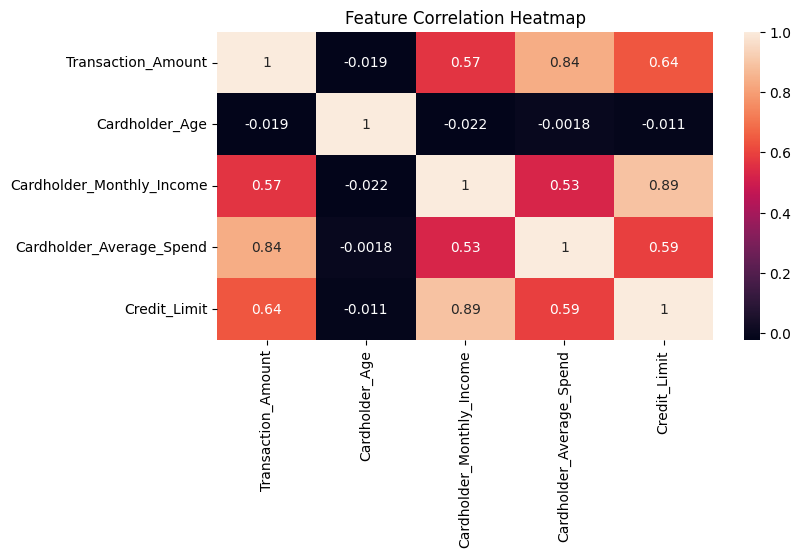

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,4))
numerical_data = df.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(),annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

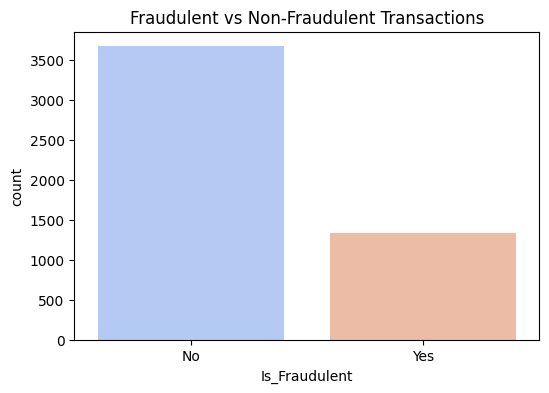

In [ ]:
# Fraud vs Non-Fraud Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Is_Fraudulent'], palette='coolwarm')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.show()

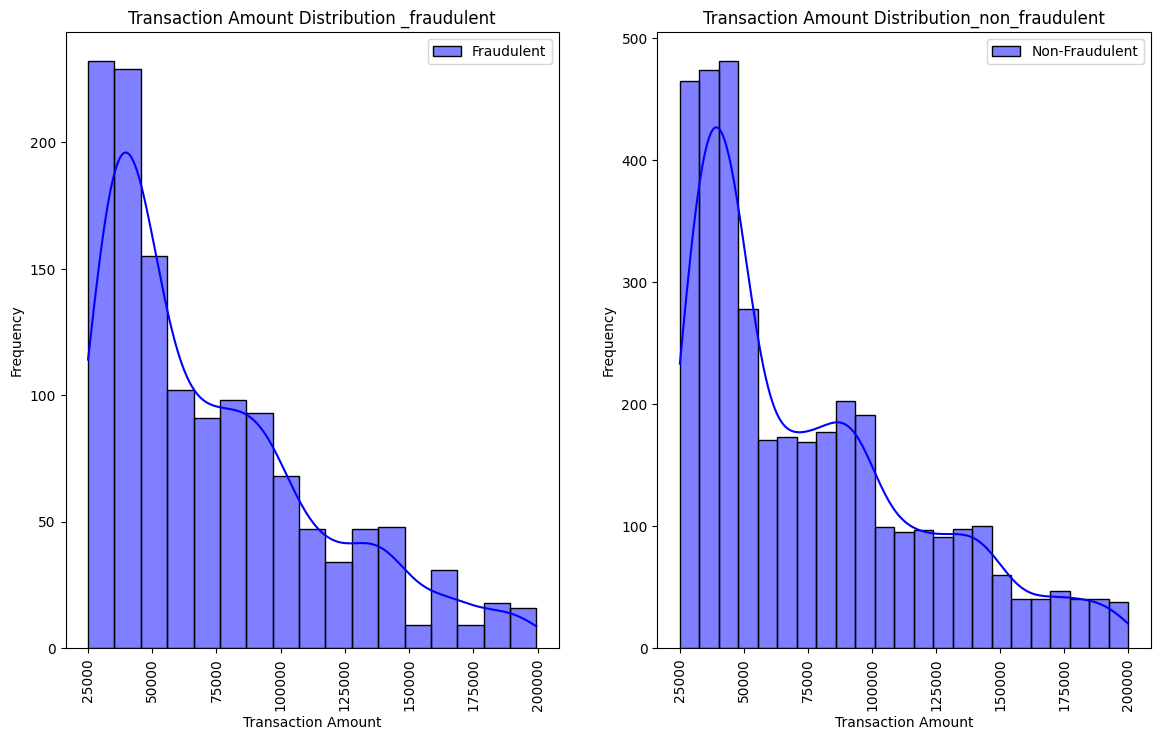

In [ ]:
# Visualizing distribution of transaction amounts for fraudulent vs non-fraudulent transactions
fraudulent = df[df['Is_Fraudulent'] == 'Yes']
non_fraudulent = df[df['Is_Fraudulent'] == 'No']

plt.figure(figsize=(14,8))

plt.subplot(1, 2, 1)
sns.histplot(fraudulent['Transaction_Amount'],kde=True,color='blue',label='Fraudulent')
plt.title('Transaction Amount Distribution _fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(non_fraudulent['Transaction_Amount'],kde=True,color='blue',label='Non-Fraudulent')
plt.title('Transaction Amount Distribution_non_fraudulent')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend()


# Data Preprocessing - Data Cleaning:

In [ ]:
cat_coll= df.select_dtypes('O').columns.tolist()
print(cat_coll)
num_coll= df.select_dtypes(np.number).columns.tolist()
print(num_coll)


['Transaction_ID', 'Card_Type', 'Merchant_Category', 'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week', 'Is_Fraudulent']
['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[cat_coll] = imputer.fit_transform(df[cat_coll])

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[num_coll] = imputer.fit_transform(df[num_coll])

In [ ]:
# z-score
from scipy.stats import zscore
z_score = zscore(df[num_coll])
outliers = df[(np.abs(z_score) < 3)]
outliers.shape


(5000, 15)

In [ ]:
df[num_coll].skew()

,0
Transaction_Amount,0.967102
Cardholder_Age,-0.013966
Cardholder_Monthly_Income,0.416118
Cardholder_Average_Spend,1.140255
Credit_Limit,0.012063


<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

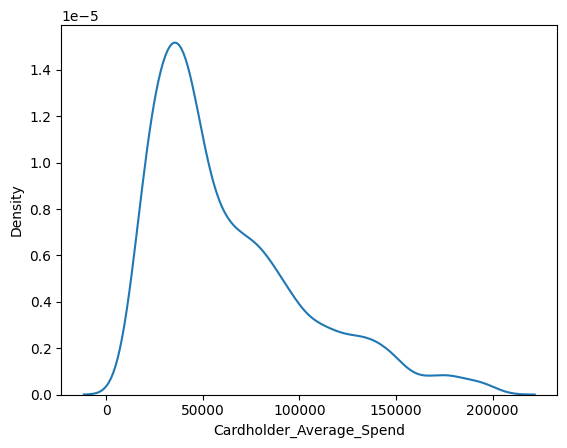

In [ ]:
sns.kdeplot(df['Cardholder_Average_Spend'])

<Axes: xlabel='Cardholder_Average_Spend', ylabel='Density'>

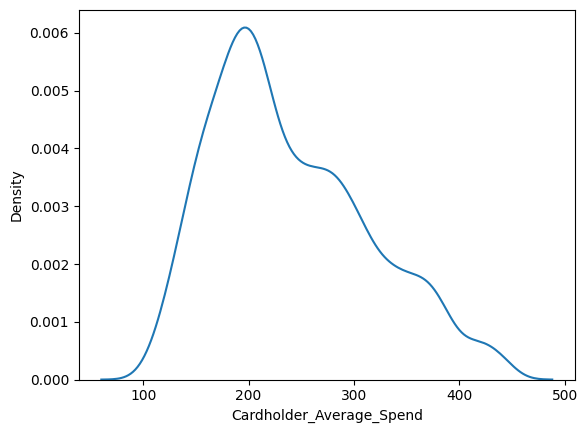

In [ ]:
df['Cardholder_Average_Spend'] =np.sqrt (df['Cardholder_Average_Spend'])
sns.kdeplot (df['Cardholder_Average_Spend'])

# Feature Engineering:

In [ ]:
# Encoding categorical variables
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

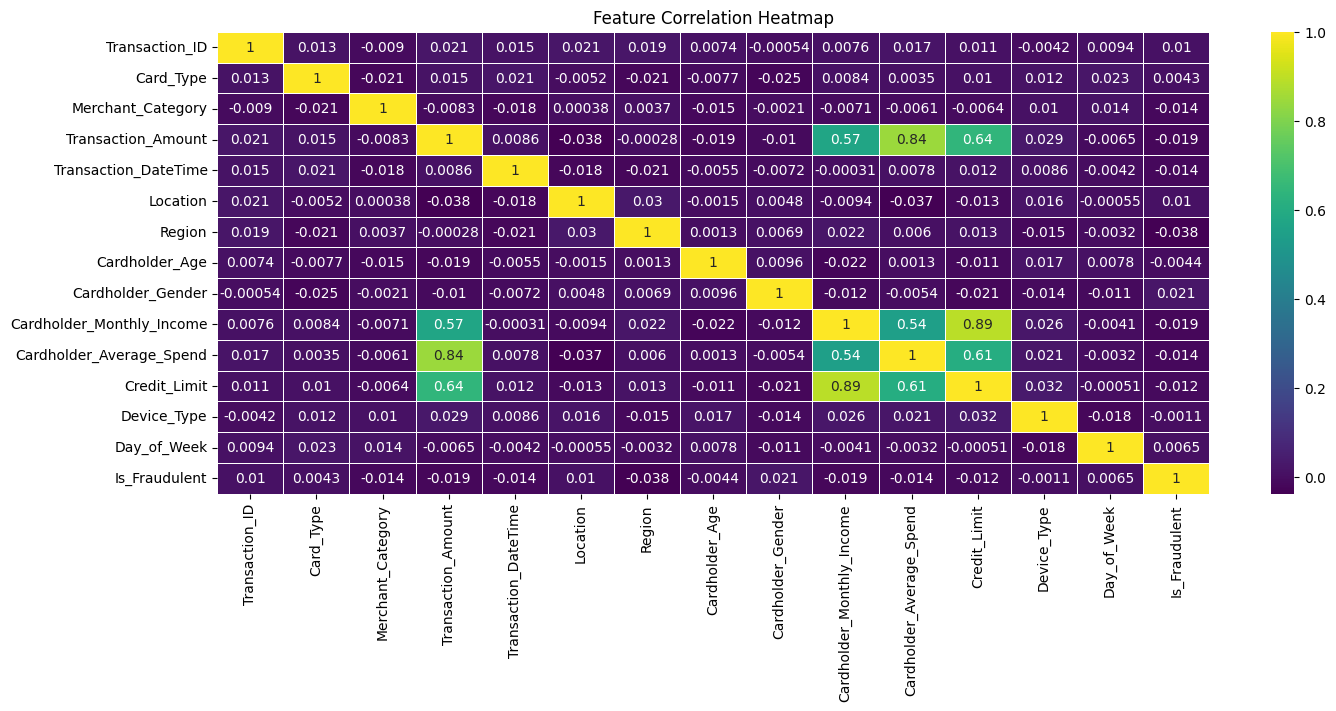

In [ ]:
# Correlation Heatmap in visulition
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# using Function to get a correlative coloumns
correlation_mat= df.corr()
correlation_mat.head(5)

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
Transaction_ID,1.000000,0.013285,-0.009008,0.020636,0.014737,0.020656,0.019082,0.007409,-0.000535,0.007621,0.016900,0.010510,-0.004166,0.009378,0.010376
Card_Type,0.013285,1.000000,-0.021039,0.014526,0.021348,-0.005191,-0.020697,-0.007652,-0.025105,0.008446,0.003497,0.010477,0.011610,0.022635,0.004290
Merchant_Category,-0.009008,-0.021039,1.000000,-0.008314,-0.018214,0.000382,0.003659,-0.014570,-0.002060,-0.007135,-0.006105,-0.006416,0.009959,0.014427,-0.013647
Transaction_Amount,0.020636,0.014526,-0.008314,1.000000,0.008635,-0.037910,-0.000280,-0.018667,-0.010494,0.571281,0.842195,0.640021,0.029060,-0.006519,-0.018593
Transaction_DateTime,0.014737,0.021348,-0.018214,0.008635,1.000000,-0.018257,-0.021091,-0.005475,-0.007168,-0.000310,0.007776,0.011589,0.008610,-0.004194,-0.013907


In [ ]:
correlation_mat['Is_Fraudulent'].sort_values(ascending=False)

,Is_Fraudulent
Is_Fraudulent,1.000000
Cardholder_Gender,0.020621
Transaction_ID,0.010376
Location,0.010019
Day_of_Week,0.006478
Card_Type,0.004290
Device_Type,-0.001107
Cardholder_Age,-0.004392
Credit_Limit,-0.012070
Merchant_Category,-0.013647


#Feature Selection:

In [ ]:
x = df[[*num_coll,'Card_Type','Location','Cardholder_Gender','Merchant_Category','Device_Type']]
y = df['Is_Fraudulent']

# Split data into training and testing:

In [ ]:
# Data Splitting method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:

from sklearn.preprocessing import StandardScaler
s_c = StandardScaler()

x_train [num_coll] = s_c.fit_transform (x_train [num_coll])
x_test [num_coll] =s_c.transform (x_test [num_coll])

# Build the Machine Learning Model:

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train[num_coll]=scaler.fit_transform(x_train[num_coll])
x_test[num_coll]=scaler.fit_transform(x_test[num_coll])

In [ ]:
# Import the SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [ ]:
# Fit the imputer to the training data and transform both training and testing data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [ ]:
# Import Necessory libraries of Model building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
classifier={
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=500),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(class_weight='balanced')}

In [ ]:
# F1 - test
results = {}

for name, clf in classifier.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': accuracy, 'F1_Score': f1}

In [ ]:
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  F1_Score
Logistic Regression     0.503  0.323810
Naive Bayes             0.753  0.000000
Decision Tree           0.615  0.277674
Random Forest           0.748  0.007874
K-Nearest Neighbors     0.701  0.198391
SVM                     0.435  0.358683


In [ ]:
# selection of best model
best_model_name = results_df['F1_Score'].idxmax()
best_model = classifier[best_model_name]
print(f"\nBest model: {best_model_name}")


Best model: SVM


In [ ]:
y_pred_best = best_model.predict(x_test)

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Confusion Matrix:
[[277 476]
 [ 89 158]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.37      0.50       753
           1       0.25      0.64      0.36       247

    accuracy                           0.43      1000
   macro avg       0.50      0.50      0.43      1000
weighted avg       0.63      0.43      0.46      1000

